In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


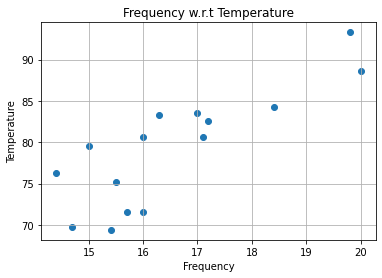

In [5]:
plt.scatter('Chirps/Second','Ground Temperature',data =df)
plt.xlabel('Frequency')
plt.ylabel('Temperature')
plt.title('Frequency w.r.t Temperature')
plt.grid()

In [6]:
import seaborn as sns


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chirps/Second', ylabel='Ground Temperature'>

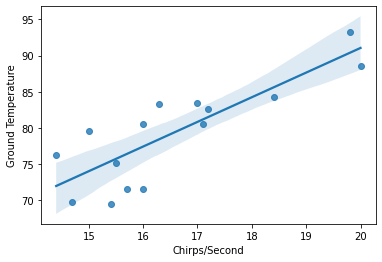

In [7]:
sns.regplot('Chirps/Second','Ground Temperature',data =df)

<AxesSubplot:>

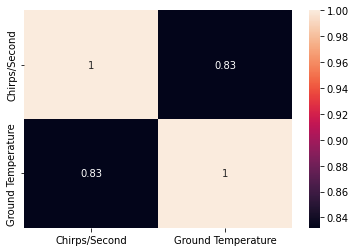

In [8]:
sns.heatmap(df.corr(),annot=True)

## The above figures states that the features of the dataset are highly corelated and are increase linearly 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df['Chirps/Second'],df['Ground Temperature'],test_size = 0.33)

In [19]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
pred = model.predict(x_test.values.reshape(-1,1))

### Task 3

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_true = y_test,y_pred = pred)

0.7002033137011565

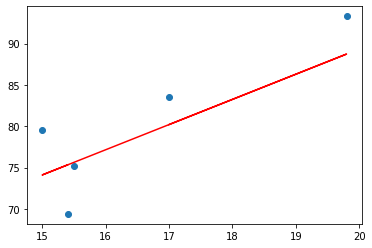

In [21]:
plt.scatter(x_test,y_test)
plt.plot(x_test,pred,color='red')
plt.show()

### Task 4

In [23]:
newmodel = LinearRegression()
newmodel.fit(y_train.values.reshape(-1,1),x_train.values.reshape(-1,1))
newmodel.predict([[95]])


array([[20.04487969]])

### The chirps would be chirping at the rate of 19.70 chirps/min

### Task 5

In [25]:
model.predict([[18]])

array([[83.24443398]])

### The temperature of the ground will be 83.59F

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [91]:
import pandas as pd

In [92]:
dft = pd.read_fwf("C:\\Users\\Lenovo\\Downloads\\brain_body.txt")

In [93]:
dft

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [94]:
dft.isnull().sum()

Brain    0
Body     0
dtype: int64

In [95]:
dft.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


<IPython.core.display.Javascript object>


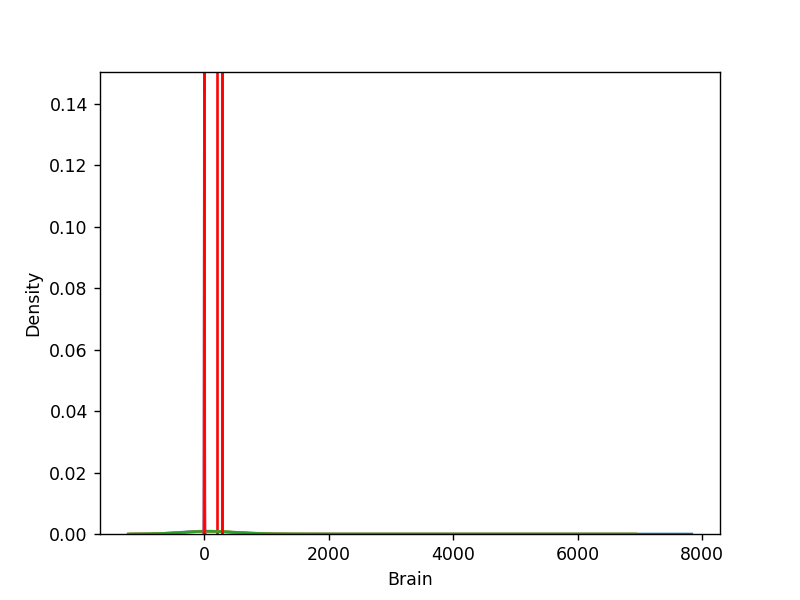

In [96]:
sns.kdeplot(dft['Brain'])
plt.axvline(dft['Brain'].mean(),color = 'r')

In [98]:
sns.kdeplot(dft['Body'])
plt.axvline(dft['Body'].mean(),color = 'r')

### By the above plots i have identified that the data is left skewed and to deals with it i am performing log normal distribution

In [99]:
dfk = dft.copy()
dfk = np.log(dfk)

In [100]:
sns.kdeplot(dfk['Brain'])
plt.axvline(dfk['Brain'].mean(),color = 'r')

In [101]:
sns.kdeplot(dfk['Body'])
plt.axvline(dfk['Body'].mean(),color = 'r')

In [102]:
import matplotlib.pyplot as plt 
import seaborn as sns

<IPython.core.display.Javascript object>


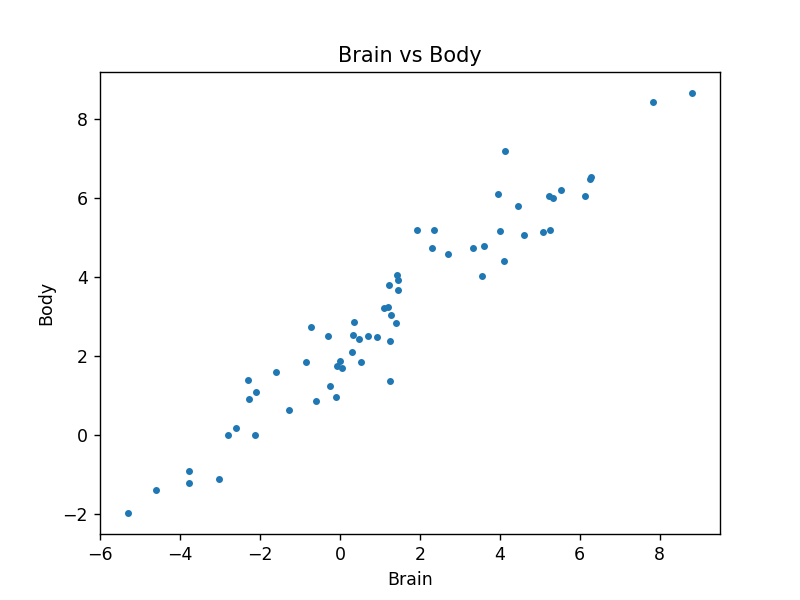

In [103]:
 %matplotlib notebook
plt.plot(dfk['Brain'],dfk['Body'],".")
plt.xlabel('Brain')
plt.ylabel('Body')
plt.title('Brain vs Body')
plt.show()

<AxesSubplot:>

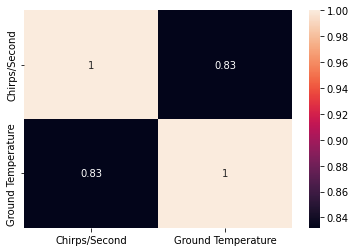

In [104]:
%matplotlib inline
sns.heatmap(df.corr(),annot = True)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brain', ylabel='Body'>

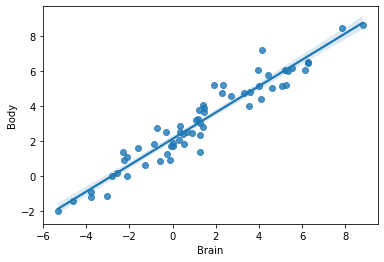

In [105]:
sns.regplot('Brain','Body',data=dfk)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brain'>

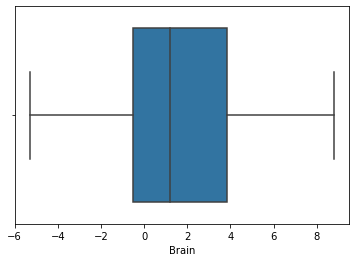

In [106]:
sns.boxplot(dfk['Brain'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body'>

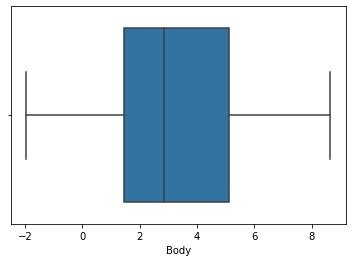

In [107]:
sns.boxplot(dfk['Body'])

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dfk['Brain'],dfk['Body'],test_size = 0.3)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn.metrics import r2_score,mean_squared_error

In [111]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
pred = model.predict(x_test.values.reshape(-1,1))

In [112]:
print('r2 score = {}'.format(r2_score(y_true = y_test,y_pred = pred)))
print('mean squared error = {}'.format(mean_squared_error(y_true = y_test,y_pred = pred)))

r2 score = 0.9221277272747033
mean squared error = 0.41447270638744693


In [113]:
from sklearn.linear_model import SGDRegressor

In [114]:
model = SGDRegressor()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
pred = model.predict(x_test.values.reshape(-1,1))


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
from sklearn.metrics import r2_score,mean_squared_error

In [116]:
r2_score(y_true = y_test,y_pred = pred)

0.9183863807650191

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [64]:
sal = pd.read_fwf("C:\\Users\\Lenovo\\Downloads\\salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [65]:
sal.head(10)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [66]:
sal.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


<AxesSubplot:xlabel='Sex', ylabel='Density'>

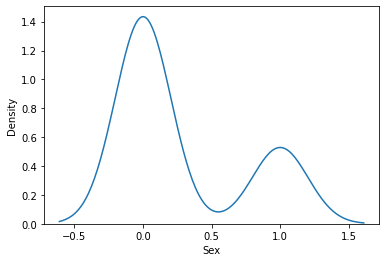

In [67]:
sns.kdeplot(sal['Sex'])

In [68]:
sal['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

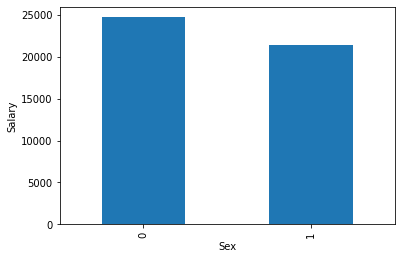

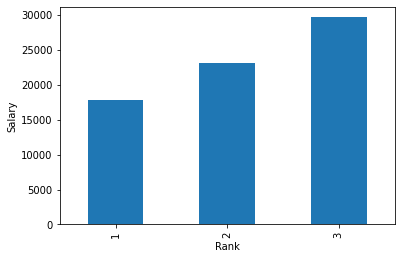

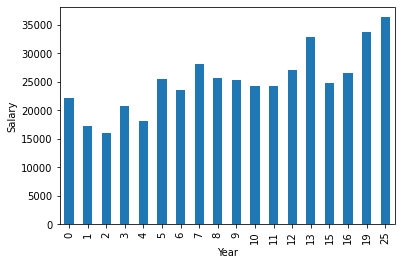

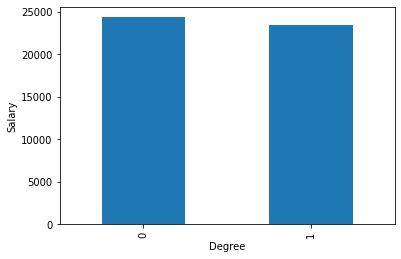

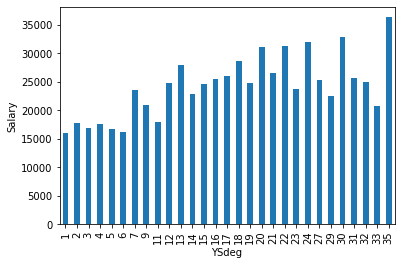

In [69]:
for i in sal.columns:
    if i!='Salary':
        sal.groupby(i)['Salary'].mean().plot.bar()
        plt.xlabel(i)
        plt.ylabel('Salary')
        plt.show()

### o - for male and 1 - for female 

In [70]:
x = [i for i in sal.columns if i!= 'Salary']

In [71]:
x = sal[x]

In [72]:
y = sal['Salary']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [75]:
from sklearn.linear_model import SGDRegressor,LinearRegression

In [76]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)

In [77]:
r2_score(y_true = y_test,y_pred = pred)

0.782448803725734

## average salary for male and female 

In [84]:
sal.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Sex'>

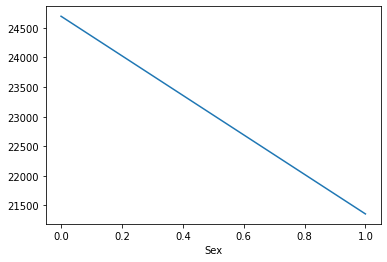

In [89]:
sal.groupby('Sex')['Salary'].mean().plot()

### As from the data and plots we can see that females are paid less salary then compared to males